In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym
import base
from src.agents import DeepQAgent
from src.util import JupyterCallback

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Environment

In [3]:
env = gym.make('Breakout-v0')

In [4]:
env.observation_space

Box(210, 160, 3)

In [5]:
env.action_space

Discrete(4)

# Agent

In [6]:
agent = DeepQAgent(env, learning_rate=1e-5, frames_per_action=4, replay_size=50000)
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<Breakout-v0>>>,
    learning_rate=1e-05,
    discount_factor=0.99,
    exploration_rate=1.0,
    exploration_decay=0.9998,
    exploration_min=0.1,
    image_size=(84, 84),
    frames_per_action=4,
    replay_size=50000
)

In [7]:
res_random = agent.play()
res_random

100%|██████████| 30/30 [00:10<00:00,  2.80game/s]


array([ 0., -1.,  1.,  0.,  2.,  2.,  2.,  0., -1.,  0.,  1.,  2., -1.,
       -1., -1.,  2., -1.,  4.,  4.,  0.,  1.,  1.,  3.,  0.,  1.,  1.,
       -1.,  0., -1.,  0.])

In [8]:
res_random.mean()

0.6333333333333333

In [9]:
agent.observe(10000)

100%|██████████| 10000/10000 [00:45<00:00, 220.50frame/s]


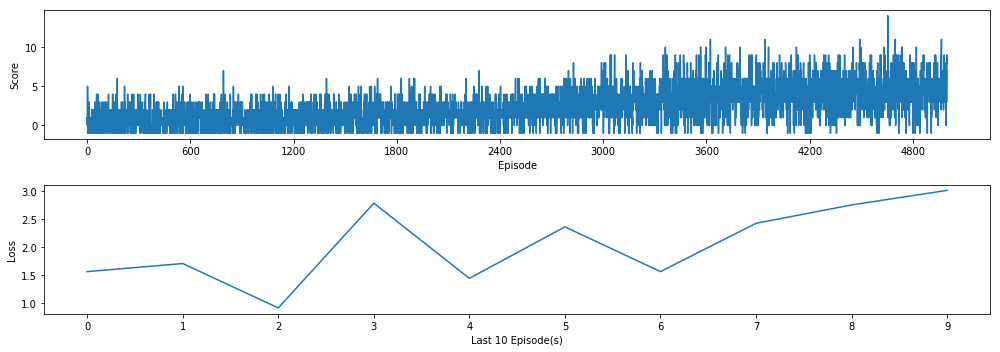

100%|██████████| 5000/5000 [6:28:31<00:00,  4.66s/episode]


In [10]:
agent.train(episodes=5000, callback=JupyterCallback())

In [11]:
res_trained = agent.play()
res_trained

100%|██████████| 30/30 [00:21<00:00,  1.40game/s]


array([ 1., 10.,  6.,  4.,  0.,  6.,  4.,  9.,  7., 11.,  3.,  2.,  5.,
        8.,  6., 11.,  0.,  3.,  4.,  7.,  7.,  1.,  0.,  7.,  3.,  7.,
        1., 13.,  5., -1.])

In [12]:
res_trained.mean()

5.0

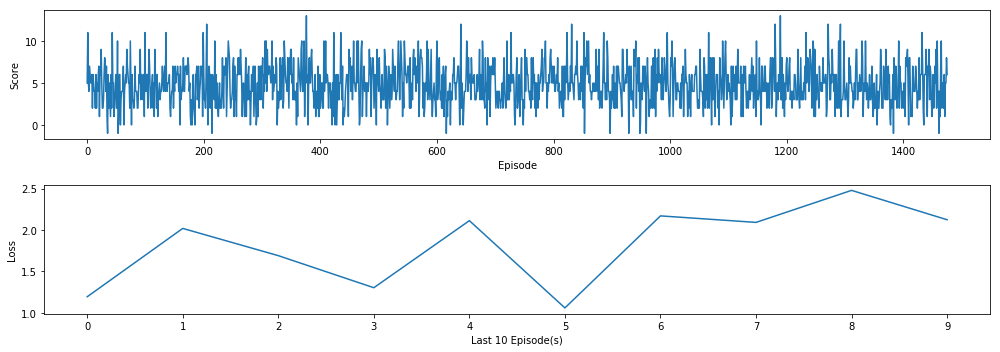

 30%|██▉       | 1476/5000 [2:22:39<5:40:36,  5.80s/episode]

KeyboardInterrupt: 

In [13]:
agent.train(episodes=5000, callback=JupyterCallback())